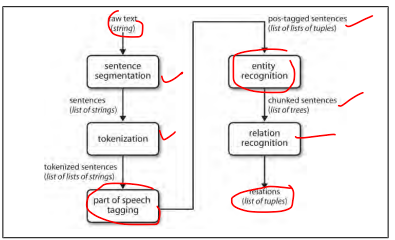

In [7]:
import nltk, re, pprint

In [8]:

def ie_preprocess(document):
    sentences = nltk.sent_tokenize(document) 
    sentences = [nltk.word_tokenize(sent) for sent in sentences] 
    sentences = [nltk.pos_tag(sent) for sent in sentences] 

    return sentences

In [32]:
ie_preprocess("that computer is not working form last two days")

[[('that', 'DT'),
  ('computer', 'NN'),
  ('is', 'VBZ'),
  ('not', 'RB'),
  ('working', 'VBG'),
  ('form', 'VBN'),
  ('last', 'JJ'),
  ('two', 'CD'),
  ('days', 'NNS')]]

In [9]:
import nltk

def ie_preprocess(document):
    # Sentence tokenization
    sentences = nltk.sent_tokenize(document)
    # Word tokenization and POS tagging
    sentences = [nltk.word_tokenize(sent) for sent in sentences]
    sentences = [nltk.pos_tag(sent) for sent in sentences]
    return sentences

def extract_tags(pos_tagged_sentences):
    # Initialize a list to store the tags
    tags = []
    
    # Define POS tags of interest (e.g., nouns and proper nouns)
    pos_tags_of_interest = ['NN', 'NNS', 'NNP', 'NNPS']  # Common and proper nouns
    
    # Iterate over POS-tagged sentences and extract words based on POS tag rules
    for sentence in pos_tagged_sentences:
        for word, pos in sentence:
            if pos in pos_tags_of_interest:
                tags.append(word.lower())  # Append word as a tag in lowercase
    
    # Return unique tags (removing duplicates)
    return list(set(tags))

# Example ticket text
ticket_text = """
I am unable to access the email server since last night. 
The connection seems to be down, and Outlook is not syncing. 
Please resolve this issue urgently as it affects our work with clients.
"""

# Preprocess the ticket text (POS tagging)
pos_tagged_sentences = ie_preprocess(ticket_text)

# Extract tags
tags = extract_tags(pos_tagged_sentences)

# Output the generated tags
print("Generated Tags:", tags)


Generated Tags: ['clients', 'connection', 'server', 'outlook', 'night', 'email', 'work', 'issue', 'access']


In [12]:
sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"), ("dog", "NN"), ("barked", "VBD"), ("at", "IN"), ("the", "DT"), ("cat", "NN")]
grammar = "NP: {<DT>?<JJ>*<NN>}" 
cp = nltk.RegexpParser(grammar) 
result = cp.parse(sentence) 
print (result) 

(S
  (NP the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN))


In [14]:

result.draw() 

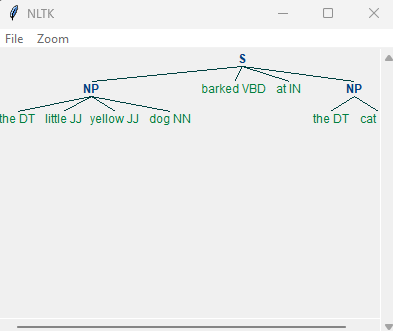

# conll2000

In [21]:
# nltk.download('conll2000')
from nltk.corpus import conll2000
cp = nltk.RegexpParser("")
test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])
print(cp.accuracy(test_sents))


ChunkParse score:
    IOB Accuracy:  43.4%%
    Precision:      0.0%%
    Recall:         0.0%%
    F-Measure:      0.0%%


In [33]:
grammar = r"NP: {<[CDJNP].*>+}"
cp = nltk.RegexpParser(grammar)
print(cp.accuracy(test_sents))


ChunkParse score:
    IOB Accuracy:  87.7%%
    Precision:     70.6%%
    Recall:        67.8%%
    F-Measure:     69.2%%


In [34]:
class UnigramChunker(nltk.ChunkParserI):
    def __init__(self, train_sents): 
        train_data = [[(t,c) for w,t,c in nltk.chunk.tree2conlltags(sent)] for sent in train_sents]
        self.tagger = nltk.UnigramTagger(train_data) 
    
    def parse(self, sentence): 
        pos_tags = [pos for (word,pos) in sentence]
        tagged_pos_tags = self.tagger.tag(pos_tags)
        chunktags = [chunktag for (pos, chunktag) in tagged_pos_tags]
        conlltags = [(word, pos, chunktag) for ((word,pos),chunktag)in zip(sentence, chunktags)]
        return nltk.chunk.conlltags2tree(conlltags)

In [35]:
test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])
train_sents = conll2000.chunked_sents('train.txt', chunk_types=['NP'])
unigram_chunker = UnigramChunker(train_sents)
print(unigram_chunker.accuracy(test_sents))

ChunkParse score:
    IOB Accuracy:  92.9%%
    Precision:     79.9%%
    Recall:        86.8%%
    F-Measure:     83.2%%


In [43]:
tree1 = nltk.Tree('NP', ['Alice'])
tree2 = nltk.Tree('NP', ['the', 'rabbit'])

tree = nltk.Tree('s',[tree2,tree1])
tree.draw()

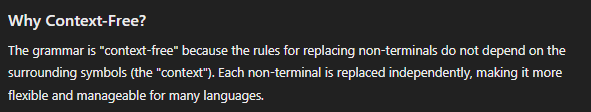

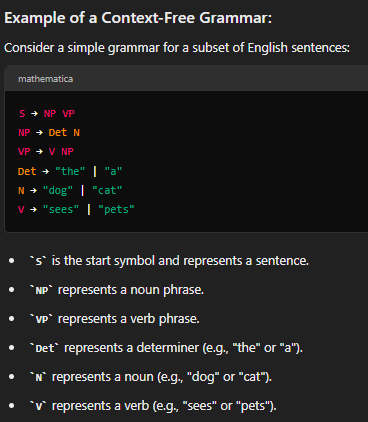

In [169]:
import nltk
from nltk import CFG

# Assuming 'mygrammar.cfg' is a file in the current directory
with open('mygrammar.cfg', 'r') as grammar_file:
    grammar = CFG.fromstring(grammar_file.read())

# Print the grammar
print(grammar)

# Create a parser
parser = nltk.ChartParser(grammar)

# Example sentence to parse
sentence = "the dog sees a cat".split()

# Parse the sentence
for tree in parser.parse(sentence):
    print(tree)
    tree.pretty_print()


Grammar with 13 productions (start state = S)
    S -> NP VP
    S -> NP CON NP
    NP -> Det N
    VP -> V NP
    VP -> CONJ NP VP
    Det -> 'the'
    Det -> 'a'
    N -> 'dog'
    N -> 'cat'
    V -> 'sees'
    V -> 'pets'
    CON -> 'and'
    CON -> 'or'
(S (NP (Det the) (N dog)) (VP (V sees) (NP (Det a) (N cat))))
             S              
      _______|____           
     |            VP        
     |        ____|___       
     NP      |        NP    
  ___|___    |     ___|___   
Det      N   V   Det      N 
 |       |   |    |       |  
the     dog sees  a      cat



In [170]:
sentence = "the dog or a cat".split()

# Parse the sentence
for tree in parser.parse(sentence):
    print(tree)
    tree.pretty_print()

(S (NP (Det the) (N dog)) (CON or) (NP (Det a) (N cat)))
             S             
      _______|_______       
     NP      |       NP    
  ___|___    |    ___|___   
Det      N  CON Det      N 
 |       |   |   |       |  
the     dog  or  a      cat



# Recursive Grammar


A grammar is said to be recursive if a category occurring on the lefthand side of a
production also appears on the righthand side of a production

In [ ]:
import nltk
from nltk import CFG

# Define a recursive grammar
recursive_grammar = CFG.fromstring("""
    S -> NP
    NP -> Det N | NP PP
    PP -> 'of' NP
    Det -> 'the'
    N -> 'dog' | 'cat' | 'bird'
""")

# Create a recursive descent parser
rd_parser = nltk.RecursiveDescentParser(recursive_grammar)

# Example sentences with recursive noun phrases
sentences = [
    "the dog",
    # "the dog of the cat",
    # "the dog of the cat of the bird"
]

# Parse each sentence
for sentence in sentences:
    print(f"\nParsing: '{sentence}'")
    for tree in rd_parser.parse(sentence.split()):
        print(tree)
        tree.pretty_print()


# Natural Language Understanding

In [187]:
from nltk import load_parser
# nltk.download('book_grammars')
cp = load_parser('grammars/book_grammars/sql0.fcfg')

def getquery(query):
    # Parse the query
    for tree in cp.parse(query.split()):
        answer = tree.label()['SEM']
        print(' '.join(answer))

getquery(# Query to be parsed
query = 'What cities are located in China'
)

SELECT City FROM city_table WHERE   Country="china"


In [189]:
nltk.data.show_cfg('grammars/book_grammars/sql0.fcfg')

% start S
S[SEM=(?np + WHERE + ?vp)] -> NP[SEM=?np] VP[SEM=?vp]
VP[SEM=(?v + ?pp)] -> IV[SEM=?v] PP[SEM=?pp]
VP[SEM=(?v + ?ap)] -> IV[SEM=?v] AP[SEM=?ap]
NP[SEM=(?det + ?n)] -> Det[SEM=?det] N[SEM=?n]
PP[SEM=(?p + ?np)] -> P[SEM=?p] NP[SEM=?np]
AP[SEM=?pp] -> A[SEM=?a] PP[SEM=?pp]
NP[SEM='Country="greece"'] -> 'Greece'
NP[SEM='Country="china"'] -> 'China'
Det[SEM='SELECT'] -> 'Which' | 'What'
N[SEM='City FROM city_table'] -> 'cities'
IV[SEM=''] -> 'are'
A[SEM=''] -> 'located'
P[SEM=''] -> 'in'
